<a href="https://colab.research.google.com/github/tiandrefreitas/estudos-python/blob/main/linkedin_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [3]:
# iniciar uma sessão local e importar dados do Airbnb
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.window import Window as w
sc = SparkSession.builder.master('local[*]').getOrCreate()
 
# carregar dados do Airbnb
df_spark = sc.read.csv("/content/sample_data/linkedin/Connections.csv", inferSchema=True, header=True)

# ver algumas informações sobre os tipos de dados de cada coluna
df_spark.printSchema()

root
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Email Address: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Connected On: string (nullable = true)



In [4]:
df_spark.show()

+------------+----------------+--------------------+--------------------+--------------------+------------+
|  First Name|       Last Name|       Email Address|             Company|            Position|Connected On|
+------------+----------------+--------------------+--------------------+--------------------+------------+
|      France|            Lage|                null|Choice Technologi...|        Data Analyst| 01 Mar 2021|
|       Thaiz|           Rocha|                null|MGS  - Minas Gera...|Analista de dados...| 01 Mar 2021|
|    Gabriela|        De Marco|                null|          Groupe PSA|Sales Business An...| 01 Mar 2021|
|     Allyson|Garreto da Costa|                null|             Hapvida|   Analista de dados| 01 Mar 2021|
|       sagar|          jadhav|                null| Dataword technology|Hadoop Administrator| 01 Mar 2021|
| Fadli Ahmad|         Jubaedi|                null|  Mahakam Beta Farma|Data Analyst - Sa...| 01 Mar 2021|
|     Santosh|          Rath

In [5]:
df_spark = df_spark.filter(f.col("Company").isNotNull()).withColumn('Company', 
                    f.when(f.col('Company')=="Conductor Tecnologia em Meios de Pagamento","Conductor Tecnologia")
                    .otherwise(f.col('Company')))

df_spark.select(f.concat(f.col("First Name"),f.lit(" "),f.col("Last Name")).alias("Name")\
                ,"Company","Position").show(20,False)

+------------------------+-------------------------------------------------+---------------------------------------------+
|Name                    |Company                                          |Position                                     |
+------------------------+-------------------------------------------------+---------------------------------------------+
|France Lage             |Choice Technologies Holding Sàrl                 |Data Analyst                                 |
|Thaiz Rocha             |MGS  - Minas Gerais Administração e Serviços S.A.|Analista de dados / Assistente administrativo|
|Gabriela De Marco       |Groupe PSA                                       |Sales Business Analyst - Brand Peugeot       |
|Allyson Garreto da Costa|Hapvida                                          |Analista de dados                            |
|sagar jadhav            |Dataword technology                              |Hadoop Administrator                         |
|Fadli Ahmad Jub

In [11]:
df_spark = df_spark.groupby("Company")\
                .agg(f.count("Company")\
                .alias("Count"))\
                .orderBy("Count", ascending=False)\
                .limit(20)
df_spark.show(20,False)

+-------------------------+-----+
|Company                  |Count|
+-------------------------+-----+
|Indra                    |280  |
|Itau Unibanco            |70   |
|Semantix                 |55   |
|BlueShift Brasil         |49   |
|Keyrus                   |39   |
|PicPay                   |37   |
|Tata Consultancy Services|36   |
|Conductor Tecnologia     |36   |
|Bradesco                 |36   |
|Tenbu                    |36   |
|Accenture                |33   |
|Autônomo                 |31   |
|Leega                    |30   |
|everis                   |29   |
|Invillia                 |27   |
|Vivo (Telefônica Brasil) |24   |
|Infomed Benner           |24   |
|Via Varejo SA            |23   |
|Capgemini                |21   |
|IBM                      |21   |
+-------------------------+-----+



In [12]:
df_pd = df_spark.toPandas()
print(df_pd.to_string(index=False))

                   Company  Count
                     Indra    280
             Itau Unibanco     70
                  Semantix     55
          BlueShift Brasil     49
                    Keyrus     39
                    PicPay     37
 Tata Consultancy Services     36
                  Bradesco     36
                     Tenbu     36
      Conductor Tecnologia     36
                 Accenture     33
                  Autônomo     31
                     Leega     30
                    everis     29
                  Invillia     27
  Vivo (Telefônica Brasil)     24
            Infomed Benner     24
             Via Varejo SA     23
                    A3Data     21
                       IBM     21


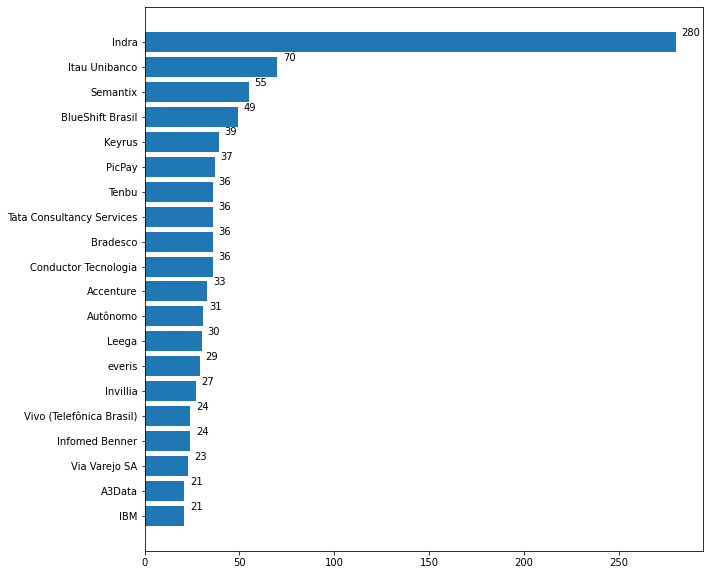

In [13]:
import matplotlib.pyplot as plt

df_pd = df_pd.sort_values(by=['Count'])
plt.figure(figsize=(10, 10))
plt.barh(df_pd.Company,df_pd.Count)
for i, v in enumerate(df_pd.Count):
    plt.text(v + 3, i + .25, str(v))
plt.show()


